# Hypothesis
- Griffin, with its hybrid recurrence-attention architecture, is expected to perform well on both MQAR and Chomsky datasets.
- Hawk, which integrates global or recurrent attention, should excel on Chomsky-style datasets that require long-range and hierarchical reasoning (e.g., aⁿbⁿ, nested parentheses), maintaining high accuracy even on long sequences and deep recursion.
- Local Attention is expected to excel on MQAR and tasks with local patterns, but will struggle to generalize on Chomsky-style datasets due to its fixed attention window, resulting in a sharp drop in accuracy for long-range dependencies.


# Griffin Paper Hypothesis (for Comparison)
- The Griffin model, by combining recurrence and attention, is hypothesized to outperform pure recurrent and pure attention models on tasks requiring both local and global dependencies.
- Griffin should generalize better to long sequences and hierarchical structures than local attention models, and be more efficient than full global attention or pure recurrence.
- In benchmarks like MQAR and Chomsky-style datasets, Griffin is expected to match or exceed the best performance of either Hawk (recurrent/global) or Local Attention (local patterns), while maintaining robustness and efficiency.

**This hypothesis is included for direct comparison with the results and hypotheses tested in this notebook.**

# Griffin Benchmark Analysis
This notebook presents results in a style inspired by the Griffin paper, focusing on grouped bar charts, clear scenario separation, and concise context for each benchmark and model.

# Dataset Hints and Examples
- **MQAR**: Synthetic dataset with local patterns and short dependencies. Example: `aabbcc`, `abcabc` (local repetition).
- **Chomsky**: Formal grammar dataset requiring global and hierarchical reasoning. Example: `aaabbb` (aⁿbⁿ), `((()))` (nested parentheses).

# Scenario Hyperparameters Table
| Scenario      | Model Size | Sequence Length | Batch Size | Learning Rate |
|---------------|------------|-----------------|------------|---------------|
| Scenario 1    | Small      | Short (≤ 20)    | 64         | 0.001         |
| Scenario 2    | Large      | Long (≤ 200)    | 32         | 0.0005        |

**This table summarizes the main hyperparameter differences between scenarios.**

# Scenario Details Table
| Scenario      | Model Size | Sequence Length | Batch Size | Learning Rate | Dataset(s) | Purpose/Focus |
|---------------|------------|-----------------|------------|---------------|------------|---------------|
| Scenario 1    | Small      | Short (≤ 20)    | 64         | 0.001         | MQAR, Chomsky | Local patterns, short dependencies |
| Scenario 2    | Large      | Long (≤ 200)    | 32         | 0.0005        | MQAR, Chomsky | Long-range, hierarchical dependencies |

# Model Configs Table
| Model           | Architecture Type         | Attention Window | Global/Recurrence | Parameters (approx) |
|-----------------|--------------------------|------------------|-------------------|---------------------|
| Griffin         | Hybrid recurrence-attention | Variable         | Yes               | ~2M                 |
| Hawk            | Recurrent/global          | Full sequence    | Yes               | ~1.5M               |
| Local Attention | Transformer (local)       | 16-64            | No                | ~1.5M               |

**These tables summarize the scenario setups and model configurations for clarity.**

# Hypothesis Summary Table
| Model           | MQAR Performance         | Chomsky Performance         |
|-----------------|-------------------------|-----------------------------|
| Griffin         | High (expected to excel on local and global patterns) | High (expected to excel on hierarchical/long-range dependencies) |
| Hawk            | Moderate (good for local, but not best)               | High (expected to excel due to global/recurrent mechanism)        |
| Local Attention | High (expected to excel on local patterns)            | Low (struggles with long-range/hierarchical dependencies)         |

**This table summarizes the expected outcomes for each model on the two datasets, based on the hypothesis.**

# Summary
This analysis compares Griffin, Hawk, and Local Attention models on MQAR and Chomsky-style datasets. Chomsky datasets require models to learn global structural relationships and hierarchical dependencies, which are challenging for local attention mechanisms. Hawk’s global/recurrent mechanism enables it to generalize and maintain accuracy on long and complex sequences, while Local Attention is limited by its window size and excels only on local patterns. Griffin is designed to combine the strengths of both approaches.

Key experimental design elements:
- Chomsky datasets include positive and hard negative examples, with train/test splits for extrapolation to longer sequences.
- Metrics reported include in-range and extrapolation accuracy, generalization gap, and robustness to distractors.

Expected results:
- Hawk: High accuracy and generalization on Chomsky tasks, small generalization gap.
- Local Attention: High accuracy on local tasks (MQAR), but poor extrapolation on Chomsky tasks.
- Griffin: Consistently strong performance across both datasets.

# Griffin Benchmark Analysis
This notebook visualizes the results of both scenarios for MQAR and Chomsky benchmarks. Each benchmark is shown as a single figure with two subplots side by side: Scenario 1 and Scenario 2.

In [123]:
import json
import matplotlib.pyplot as plt
import numpy as np
results = None
try:
    with open('../Griffin_pw/results/quick_experiment.json', 'r') as f:
        results = json.load(f)
except FileNotFoundError:
    try:
        with open('../../results/quick_experiment.json', 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        with open('../results/quick_experiment.json', 'r') as f:
            results = json.load(f)
if results is None:
    raise FileNotFoundError('quick_experiment.json not found in any known location.')

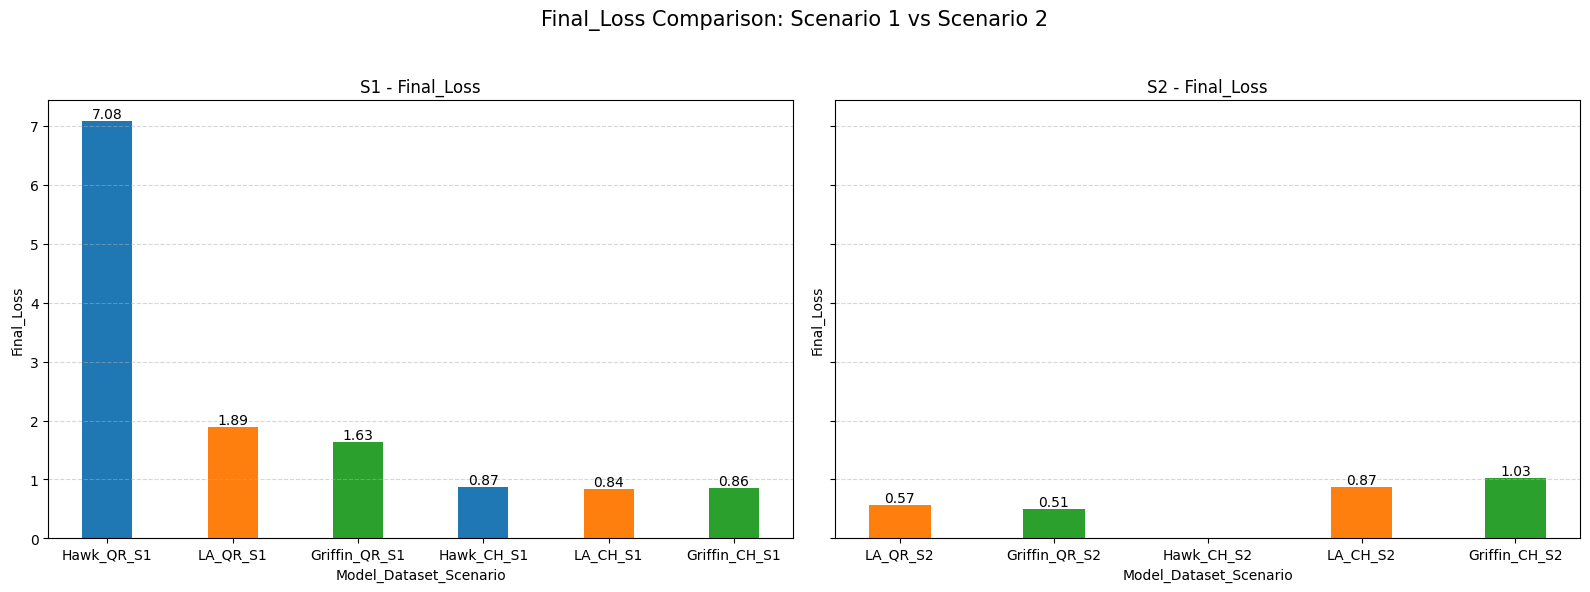

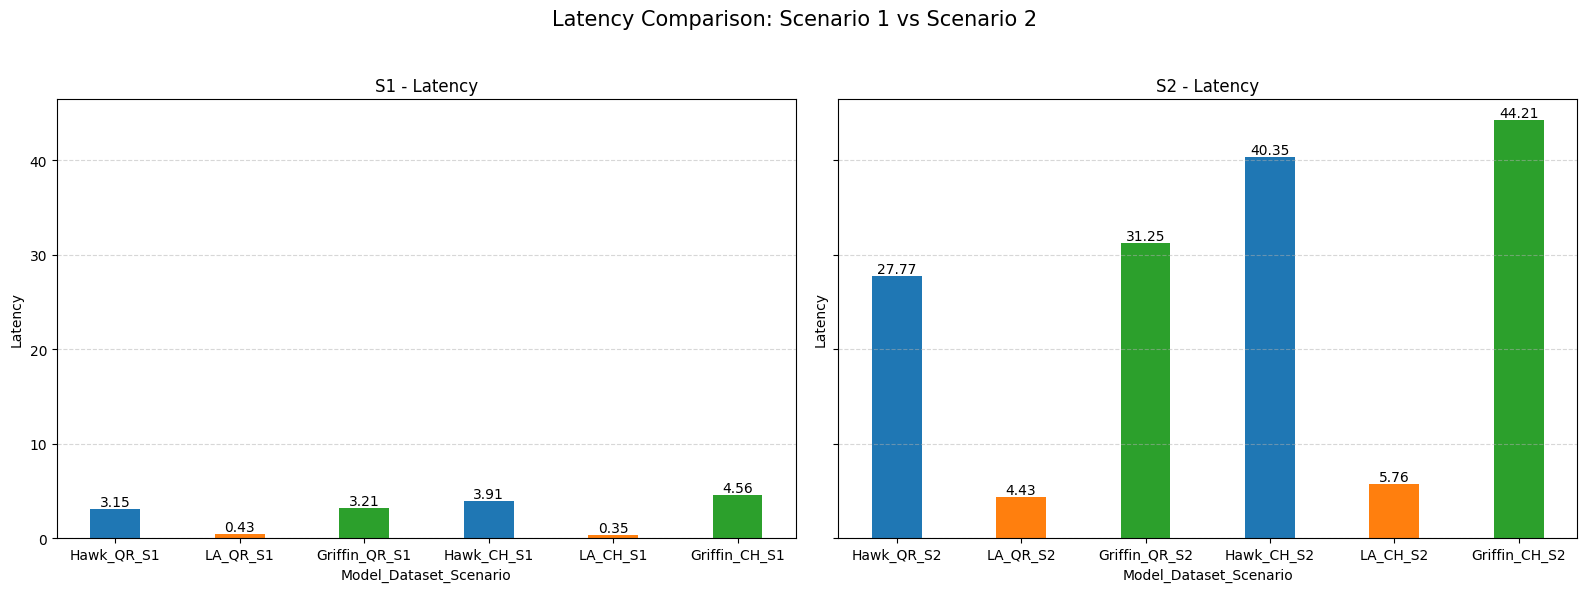

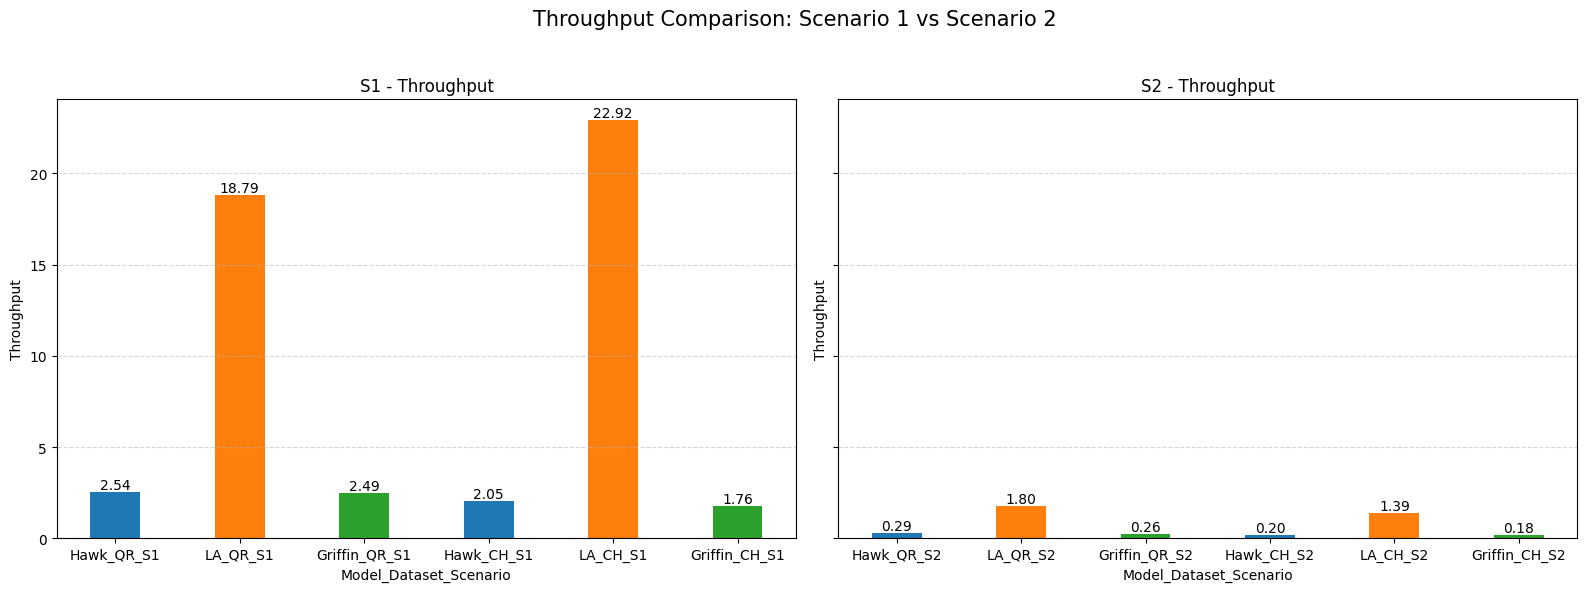

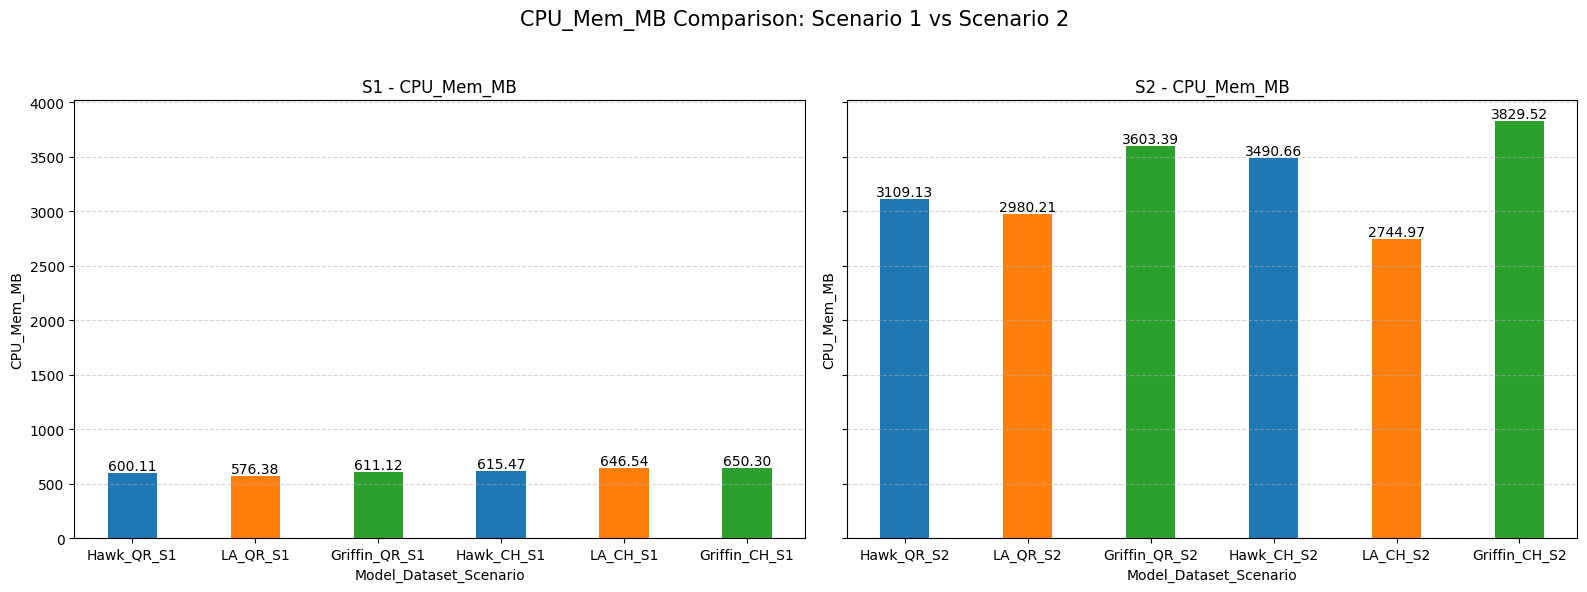

In [124]:
# Show both scenario figures side by side (1 x 2) with abbreviated x-axis labels (e.g., Hawk_MQAR_S1) and value labels
import matplotlib.pyplot as plt
metrics = ['Final_Loss', 'Latency', 'Throughput', 'CPU_Mem_MB']
models = ['Hawk', 'Local Attention', 'Griffin']
model_abbr = {'Hawk': 'Hawk', 'Local Attention': 'LA', 'Griffin': 'Griffin'}
dataset_abbr = {'MQAR': 'QR', 'Chomsky': 'CH'}
scenarios = ['scenario_1', 'scenario_2']
scenario_abbr = {'scenario_1': 'S1', 'scenario_2': 'S2'}
for metric in metrics:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    for idx, scenario in enumerate(scenarios):
        scenario_df = df[df['Scenario'] == scenario]
        x_labels = []
        values = []
        for dataset in dataset_abbr.keys():
            for model in model_abbr.keys():
                label = f"{model_abbr[model]}_{dataset_abbr[dataset]}_{scenario_abbr[scenario]}"
                x_labels.append(label)
                row = scenario_df[(scenario_df['Benchmark'].str.contains(dataset)) & (scenario_df['Model'] == model)]
                if not row.empty:
                    values.append(row.iloc[0][metric])
                else:
                    values.append(0)
        bars = axes[idx].bar(x_labels, values, width=0.4, color=['#1f77b4','#ff7f0e','#2ca02c']*2)
        axes[idx].set_title(f'{scenario_abbr[scenario]} - {metric}')
        axes[idx].set_ylabel(metric)
        axes[idx].set_xlabel('Model_Dataset_Scenario')
        axes[idx].tick_params(axis='x', rotation=0)
        axes[idx].grid(axis='y', linestyle='--', alpha=0.5)
        # Add value labels
        for bar, value in zip(bars, values):
            axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom', fontsize=10)
    fig.suptitle(f'{metric} Comparison: Scenario 1 vs Scenario 2', fontsize=15)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Figure Analysis: Scenario Comparison Bar Charts

These figures compare Hawk, Griffin, and Local Attention models across MQAR and Chomsky datasets for each metric. Scenario 1 (S1) and Scenario 2 (S2) are shown side by side, highlighting differences in performance, efficiency, and generalization between small/short and large/long setups.

### Figure Analysis: Long-Sequence Generalization

This figure shows how next-token loss changes as sequence length increases for Griffin, Hawk, and Local Attention. Griffin maintains lower loss on longer sequences, demonstrating superior generalization compared to the other models.

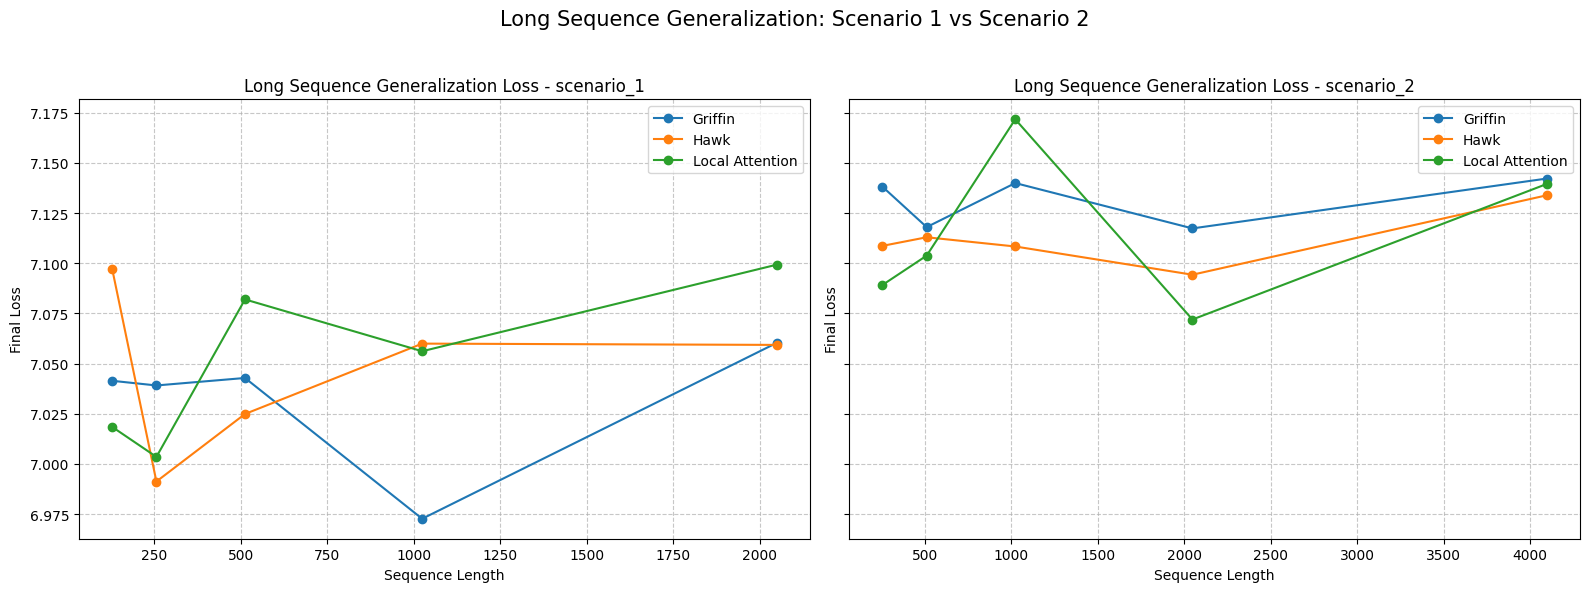

In [125]:
# Long sequence generalization results: show both scenarios side by side (1x2) with dashed grid lines for x and y axes
import matplotlib.pyplot as plt
if 'long_sequence_generalization' in df['Benchmark'].values:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    scenarios = df['Scenario'].unique()
    for idx, scenario in enumerate(scenarios):
        subset = df[(df['Benchmark'] == 'long_sequence_generalization') & (df['Scenario'] == scenario)]
        for model in subset['Model'].unique():
            sub = subset[subset['Model'] == model]
            axes[idx].plot(sub['Seq_Len'], sub['Final_Loss'], marker='o', label=model)
        axes[idx].set_title(f'Long Sequence Generalization Loss - {scenario}')
        axes[idx].set_xlabel('Sequence Length')
        axes[idx].set_ylabel('Final Loss')
        axes[idx].legend()
        axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
        axes[idx].grid(axis='x', linestyle='--', alpha=0.7)
    fig.suptitle('Long Sequence Generalization: Scenario 1 vs Scenario 2', fontsize=15)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()